## Car Price Prediction

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Importing Dataset

In [2]:
cars = pd.read_csv('CarPrice.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
sum(cars.isna().sum())

0

In [5]:
cars.duplicated().sum()

0

In [6]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
cars.describe(include='object').T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [9]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
cars.dtypes[cars.dtypes == object]

CarName           object
fueltype          object
aspiration        object
doornumber        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
dtype: object

In [11]:
# Values of Categorical datatype

cat_cols = cars.dtypes[cars.dtypes == object].index
for col in cat_cols:
    if col != 'CarName':
        print(col)
        print(cars[col].unique())
        print()

fueltype
['gas' 'diesel']

aspiration
['std' 'turbo']

doornumber
['two' 'four']

carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel
['rwd' 'fwd' '4wd']

enginelocation
['front' 'rear']

enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



#### Data [ " CarName " Column ] Cleaning

In [12]:
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
cars['CarName'].unique()[4].split()[0]

'audi'

In [14]:
cars['CarName'] = cars['CarName'].apply(lambda x: x.split()[0])
cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
cars['CarName'] = cars['CarName'].str.replace('maxda', 'mazda')
cars['CarName'] = cars['CarName'].str.replace('porcshce', 'porsche')
cars['CarName'] = cars['CarName'].str.replace('toyouta', 'toyota')
cars['CarName'] = cars['CarName'].str.replace('vokswagen', 'volkswagen')
cars['CarName'] = cars['CarName'].str.replace('vw', 'volkswagen')
cars['CarName'] = cars['CarName'].str.replace('Nissan', 'nissan')
cars['CarName'] = cars['CarName'].str.replace('isuzu', 'isuzi')
cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzi', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Exploratory Data Analysis

#### EDA - Categorical Data

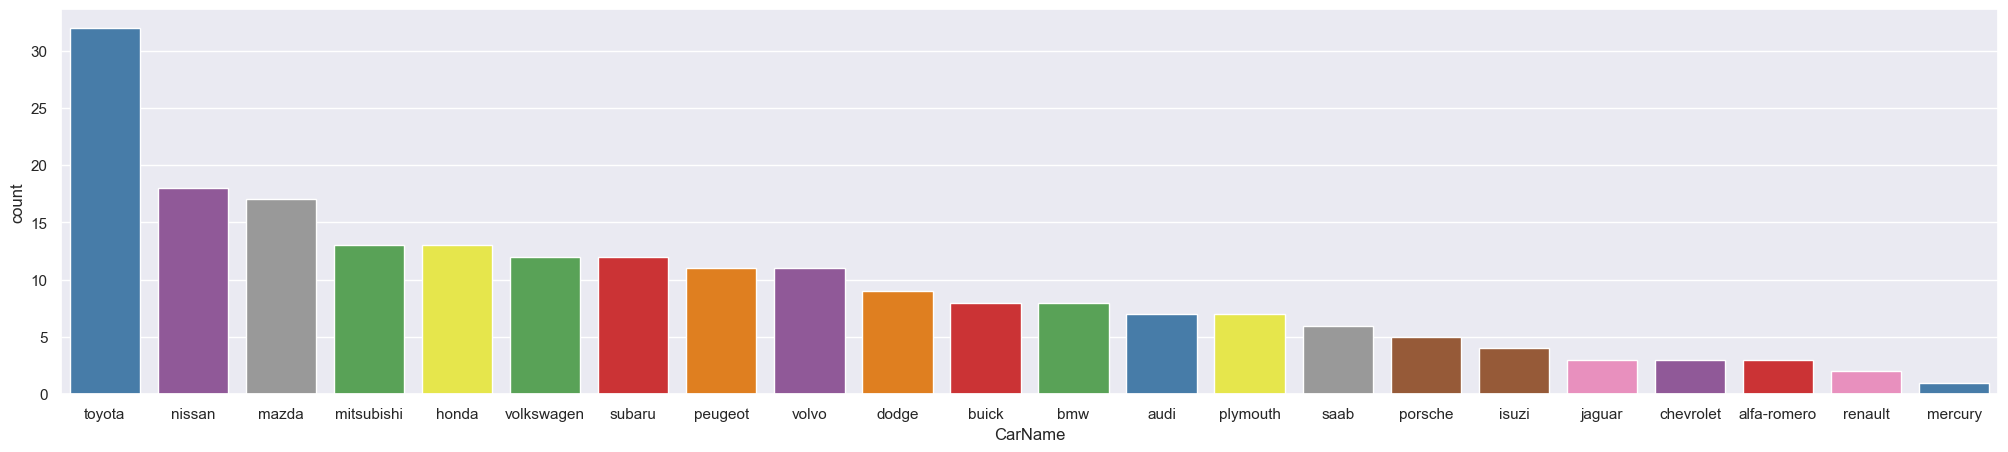

In [16]:
plt.figure(figsize = (25, 5))
sns.countplot(x = 'CarName', data = cars, order = cars['CarName'].value_counts().index, palette = 'Set1', hue=cars['CarName'])
plt.xlabel('CarName')
plt.ylabel('count')
plt.show()

### => Average price of cars of each brand

In [17]:
cars.groupby(cars['CarName'])['price'].mean().sort_values(ascending = False)

CarName
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzi           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

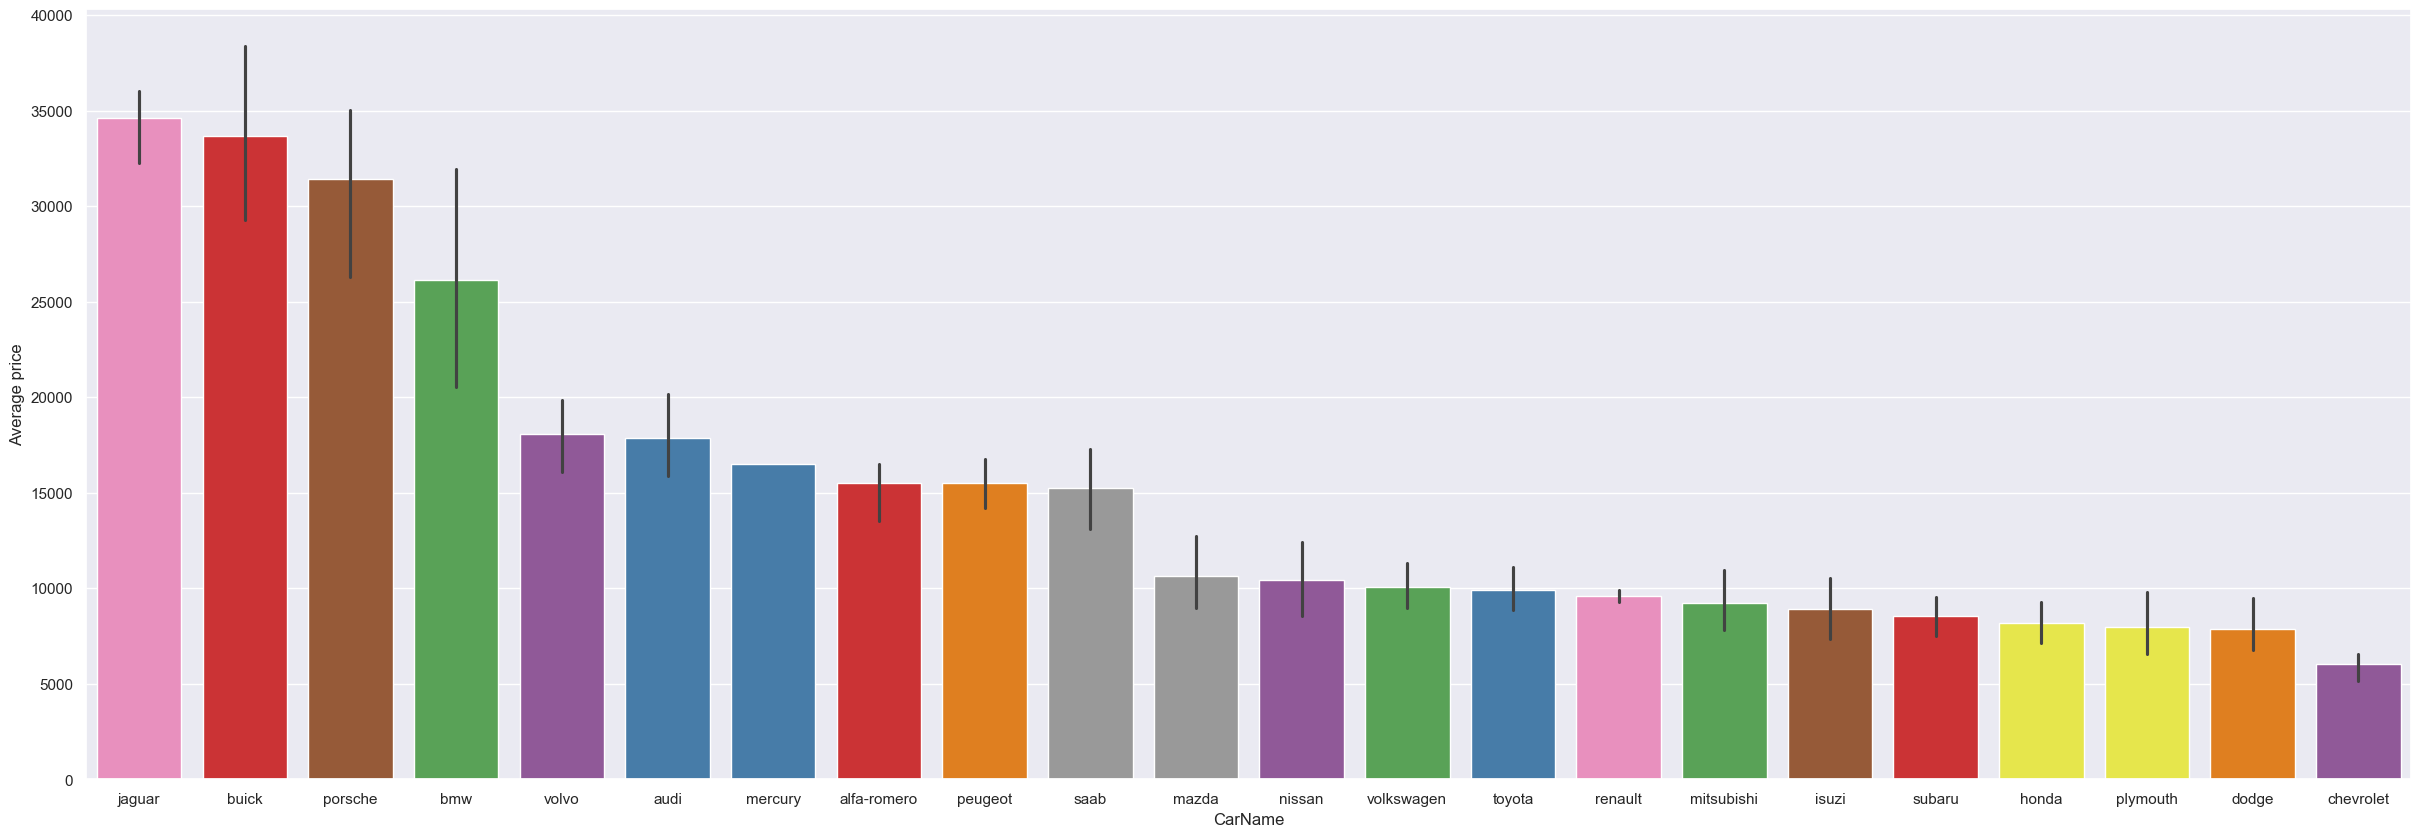

In [18]:
plt.figure(figsize = (30, 10))
sns.barplot(x = 'CarName', y = 'price', data = cars, order = cars.groupby(cars['CarName'])['price'].mean().sort_values(ascending = False).index, palette = 'Set1', hue = cars['CarName'])
plt.ylabel('Average price')
plt.show()

<Figure size 3000x500 with 0 Axes>

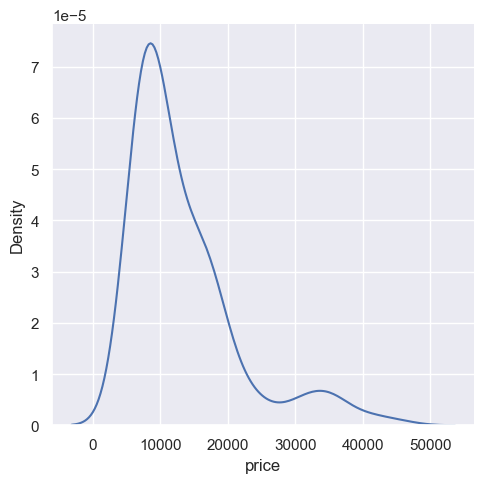

In [19]:
plt.figure(figsize = (30, 5))
sns.displot(x = 'price', data = cars, kind = 'kde')    

<Axes: xlabel='price', ylabel='Count'>

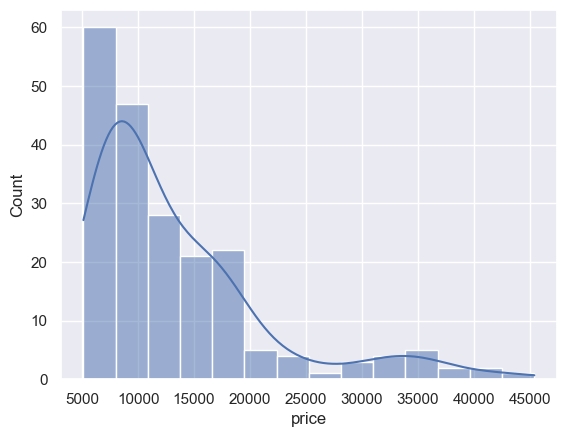

In [20]:
sns.histplot(x = 'price', data = cars, kde = True)

In [21]:
cars['fueltype'].value_counts().reset_index()

,fueltype,count
0,gas,185
1,diesel,20


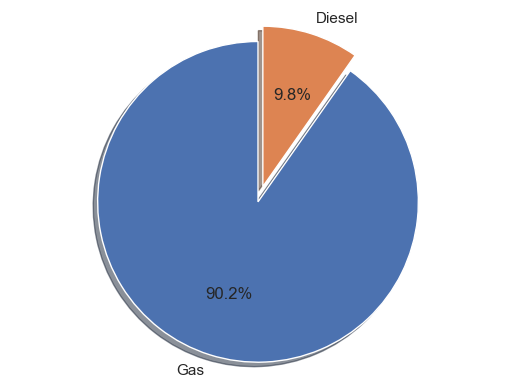

In [22]:
# Pie chart
labels = 'Gas', 'Diesel'
sizes = [185, 20]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
cars['aspiration'].value_counts().reset_index()

,aspiration,count
0,std,168
1,turbo,37


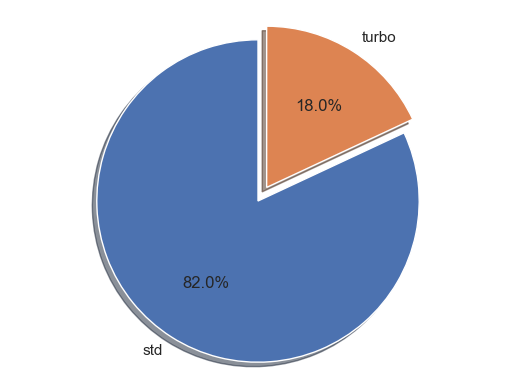

In [24]:
# Pie chart for aspiration column
labels = cars['aspiration'].value_counts().index.tolist()
sizes = cars['aspiration'].value_counts().tolist()
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [25]:
cars['doornumber'].value_counts().reset_index()

,doornumber,count
0,four,115
1,two,90


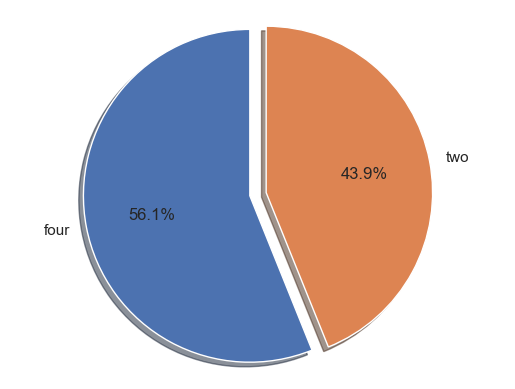

In [26]:
# pie chart for doornumber column
labels = cars['doornumber'].value_counts().index.tolist()
sizes = cars['doornumber'].value_counts().tolist()
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
cars['carbody'].value_counts().reset_index()

,carbody,count
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


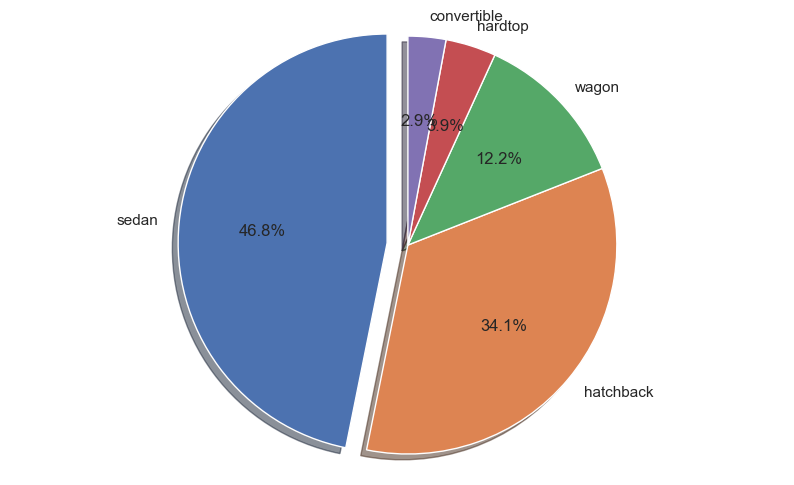

In [28]:
# Pie chart for carbody column 
fig1, ax1 = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
labels = cars['carbody'].value_counts().index.tolist()
sizes = cars['carbody'].value_counts().tolist()
explode = (0.1, 0, 0, 0, 0)  # only "explode" the first slice

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [29]:
cars['drivewheel'].value_counts().reset_index()

,drivewheel,count
0,fwd,120
1,rwd,76
2,4wd,9


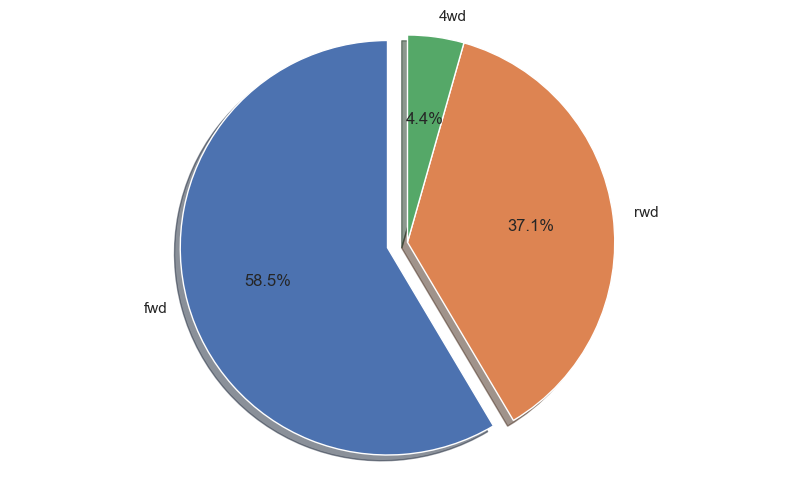

In [30]:
# Pie chart for drivewheel column
fig2, ax2 = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
labels = cars['drivewheel'].value_counts().index.tolist()
sizes = cars['drivewheel'].value_counts().tolist()
explode = (0.1, 0, 0)  # only "explode" the first slice

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



In [31]:
cars['enginelocation'].value_counts().reset_index()

,enginelocation,count
0,front,202
1,rear,3


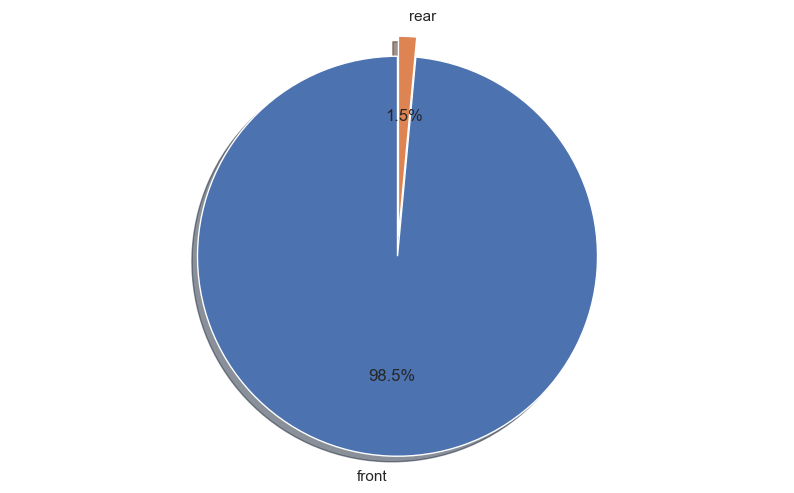

In [32]:
# Pie chart for enginelocation column
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
labels = cars['enginelocation'].value_counts().index.tolist()
sizes = cars['enginelocation'].value_counts().tolist()
explode = (0.1, 0)  # only "explode" the first slice

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [33]:
cars['enginetype'].value_counts().reset_index()

,enginetype,count
0,ohc,148
1,ohcf,15
2,ohcv,13
3,dohc,12
4,l,12
5,rotor,4
6,dohcv,1


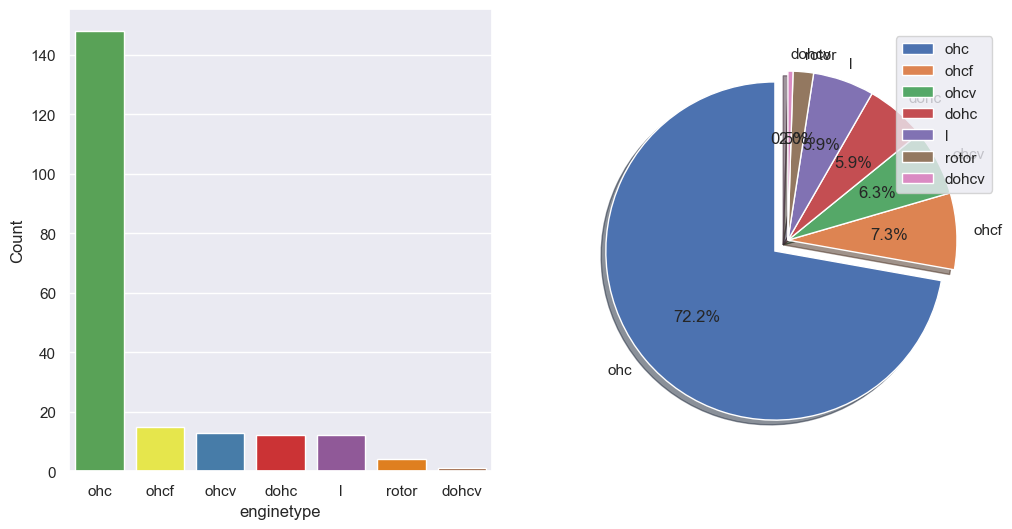

In [34]:
# Create a subplot of two charts for cylindernumber column
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot
sns.countplot(x='enginetype', data=cars, order=cars['enginetype'].value_counts().index, palette='Set1', hue=cars['enginetype'], ax=axes[0])
axes[0].set_xlabel('enginetype')
axes[0].set_ylabel('Count')

# Pie chart
labels = cars['enginetype'].value_counts().index.tolist()
sizes = cars['enginetype'].value_counts().tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the first slice
axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[1].set_aspect('equal')
axes[1].legend(labels, loc='upper right')

plt.show()

In [35]:
cars['cylindernumber'].value_counts().reset_index()

,cylindernumber,count
0,four,159
1,six,24
2,five,11
3,eight,5
4,two,4
5,three,1
6,twelve,1


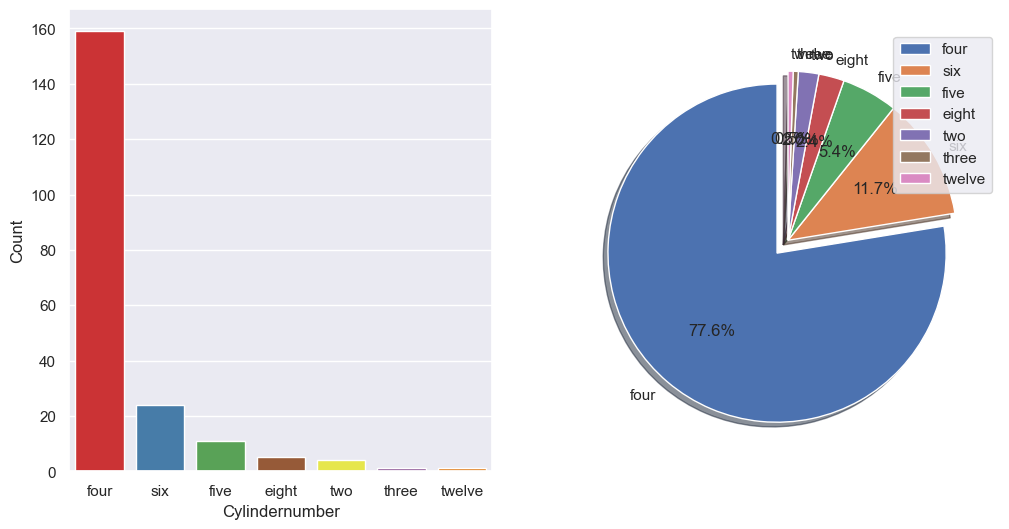

In [36]:
# Create a subplot of two charts for cylindernumber column
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot
sns.countplot(x='cylindernumber', data=cars, order=cars['cylindernumber'].value_counts().index, palette='Set1', hue=cars['cylindernumber'], ax=axes[0])
axes[0].set_xlabel('Cylindernumber')
axes[0].set_ylabel('Count')

# Pie chart
labels = cars['cylindernumber'].value_counts().index.tolist()
sizes = cars['cylindernumber'].value_counts().tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the first slice
axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[1].set_aspect('equal')
axes[1].legend(labels, loc='upper right')

plt.show()

In [37]:
cars['fuelsystem'].value_counts().reset_index()

,fuelsystem,count
0,mpfi,94
1,2bbl,66
2,idi,20
3,1bbl,11
4,spdi,9
5,4bbl,3
6,mfi,1
7,spfi,1


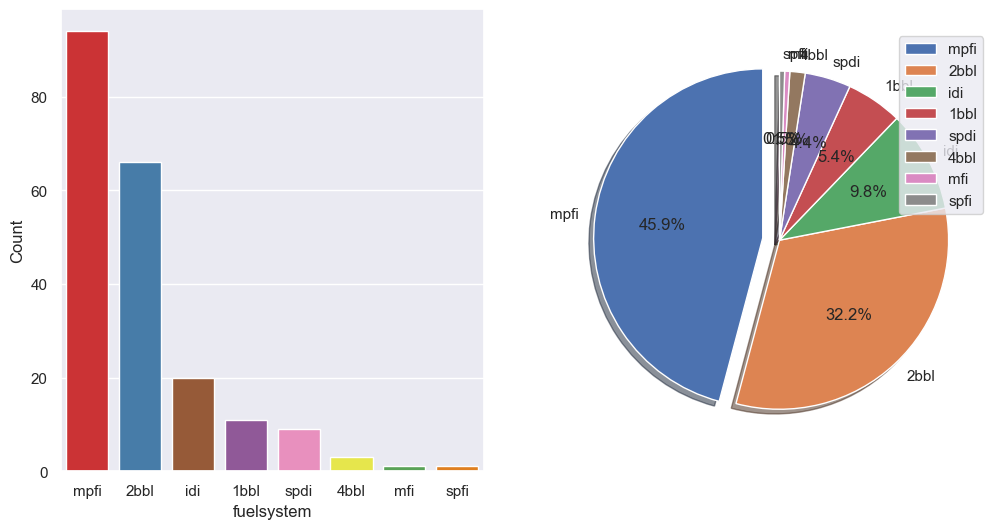

In [38]:
# Create a subplot of two charts for fuelsystem column
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot
sns.countplot(x='fuelsystem', data=cars, order=cars['fuelsystem'].value_counts().index, palette='Set1', hue=cars['fuelsystem'], ax=axes[0])
axes[0].set_xlabel('fuelsystem')
axes[0].set_ylabel('Count')

# Pie chart
labels = cars['fuelsystem'].value_counts().index.tolist()
sizes = cars['fuelsystem'].value_counts().tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the first slice
axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[1].set_aspect('equal')
axes[1].legend(labels, loc='upper right')

plt.show()

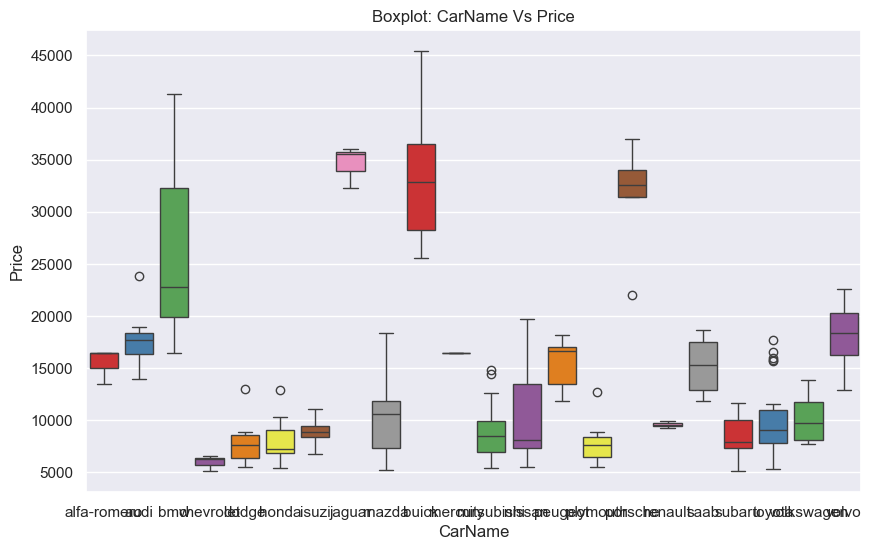

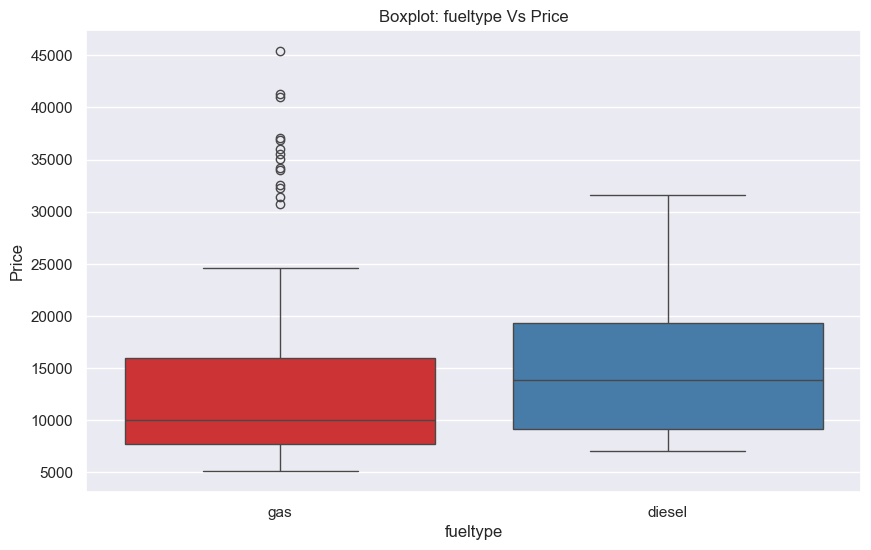

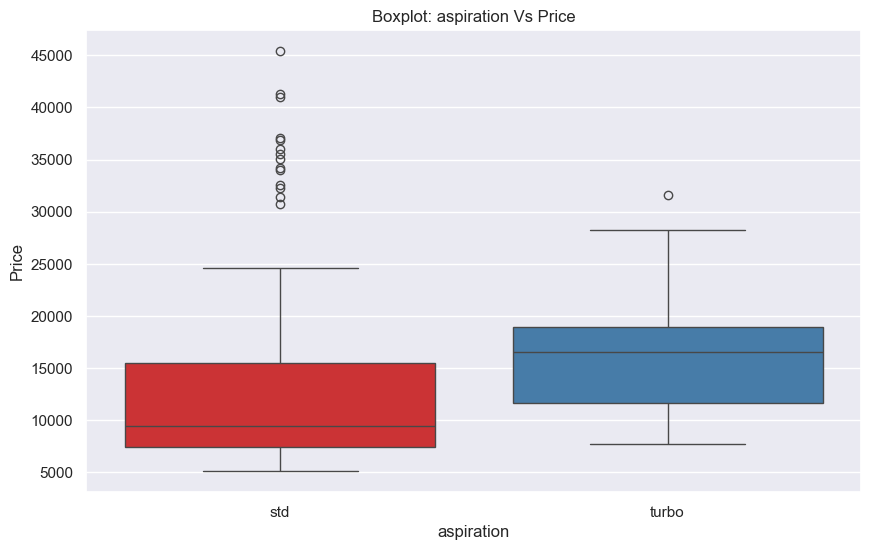

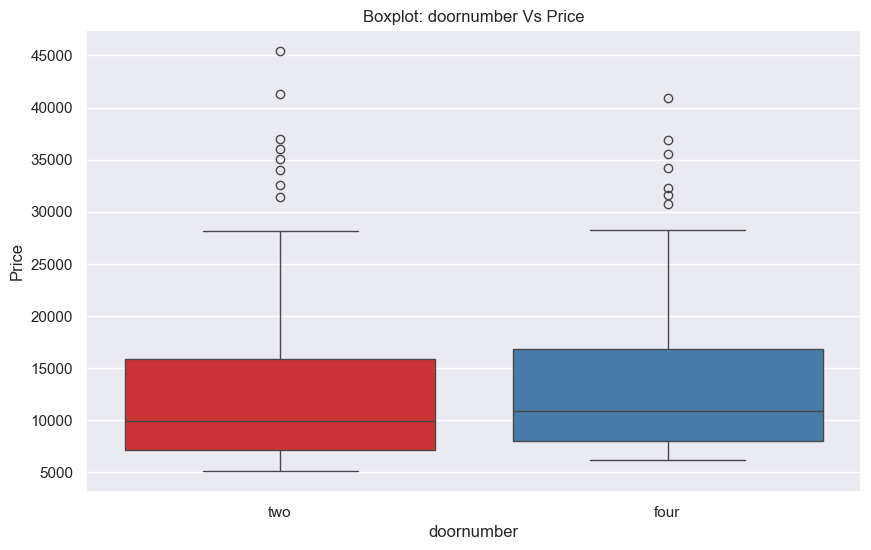

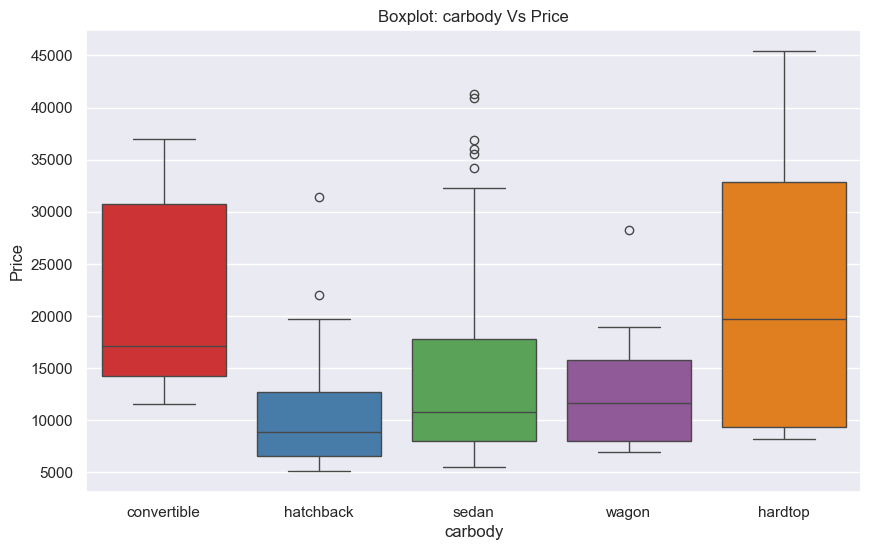

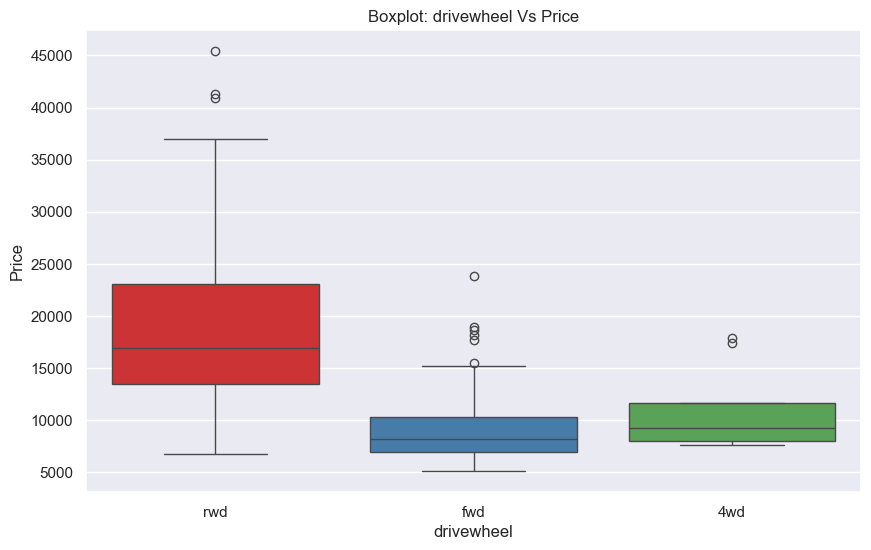

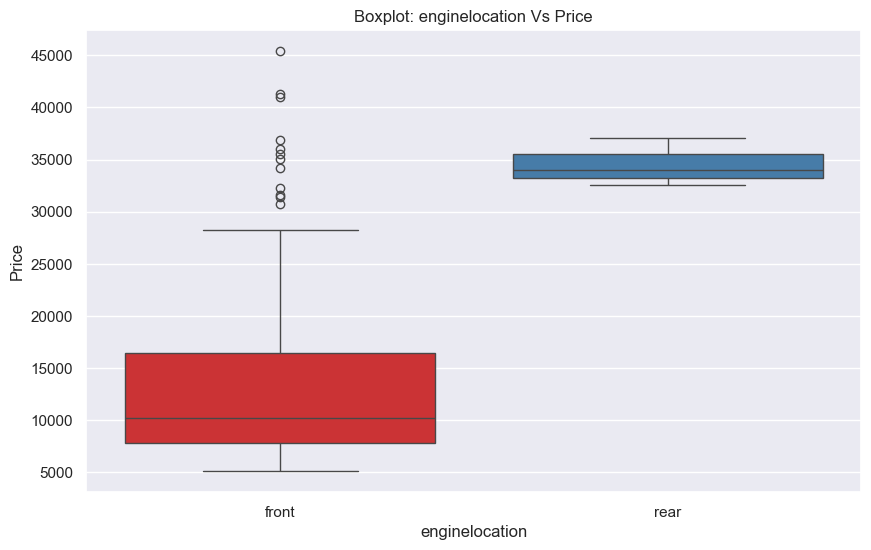

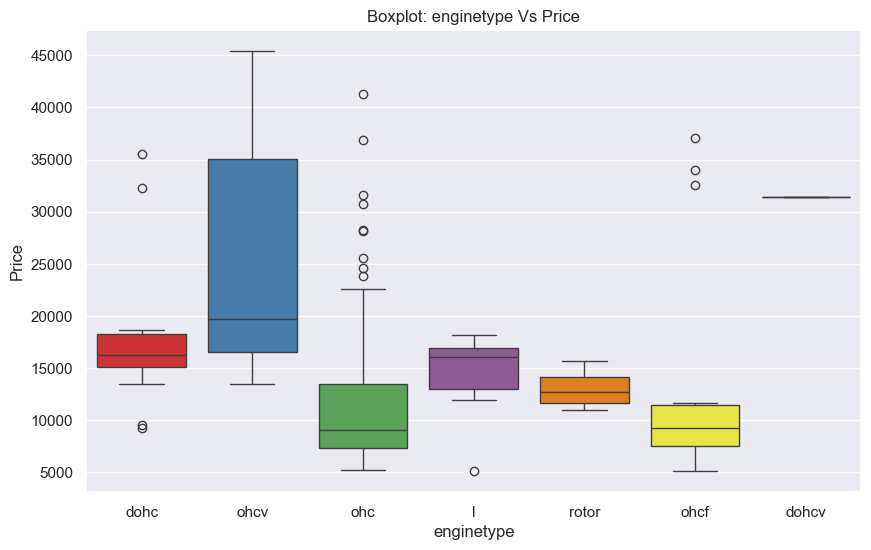

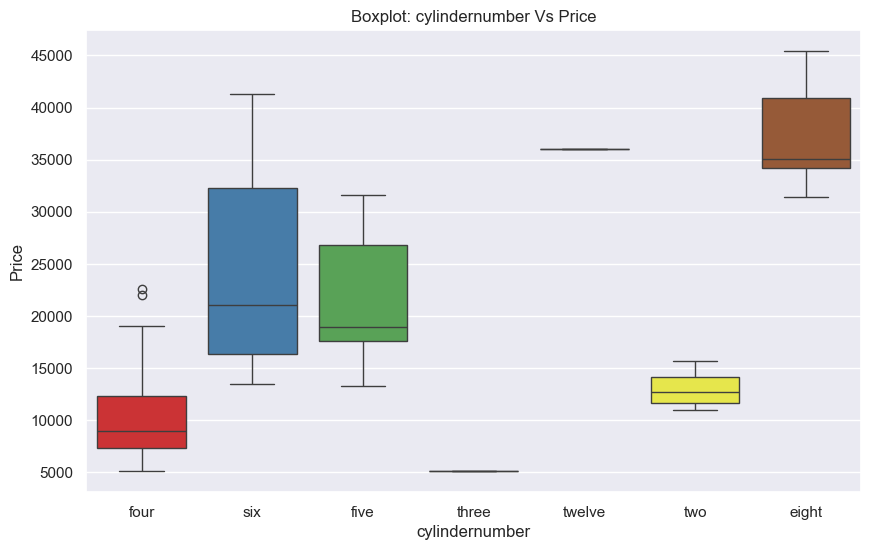

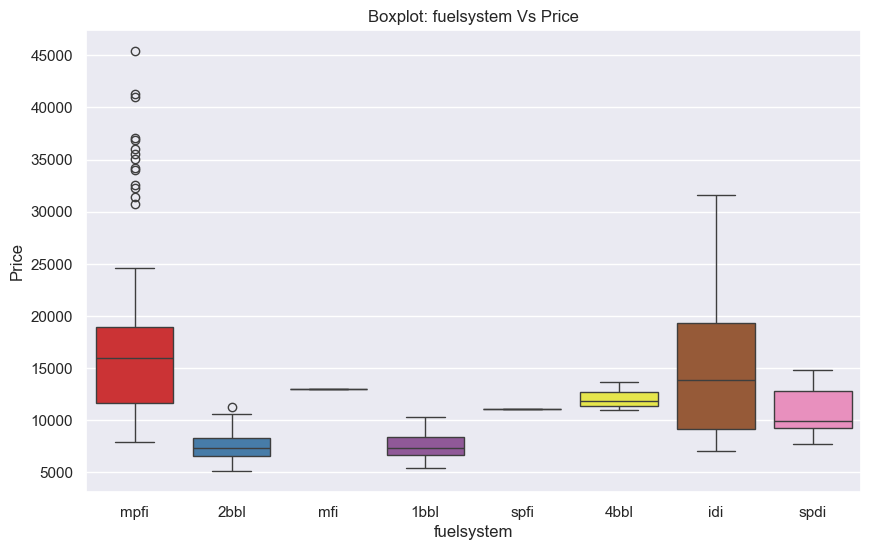

In [39]:
# Create box plot for each categorical feature

for col in cars.dtypes[cars.dtypes == 'object'].index:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='price', data=cars, palette='Set1', hue = col, legend = False)
    plt.title(f'Boxplot: {col} Vs Price')
    plt.ylabel('Price')
    plt.xlabel(col)
    plt.show()

In [40]:
cars.dtypes # Check the data types of all the columns

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [41]:
cars.dtypes[cars.dtypes != 'object'] # Check the columns that are not of type object

car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

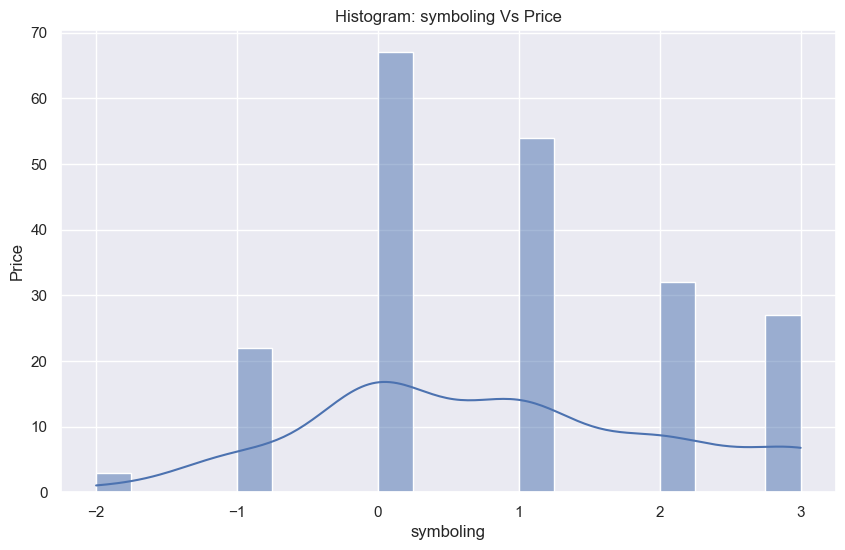

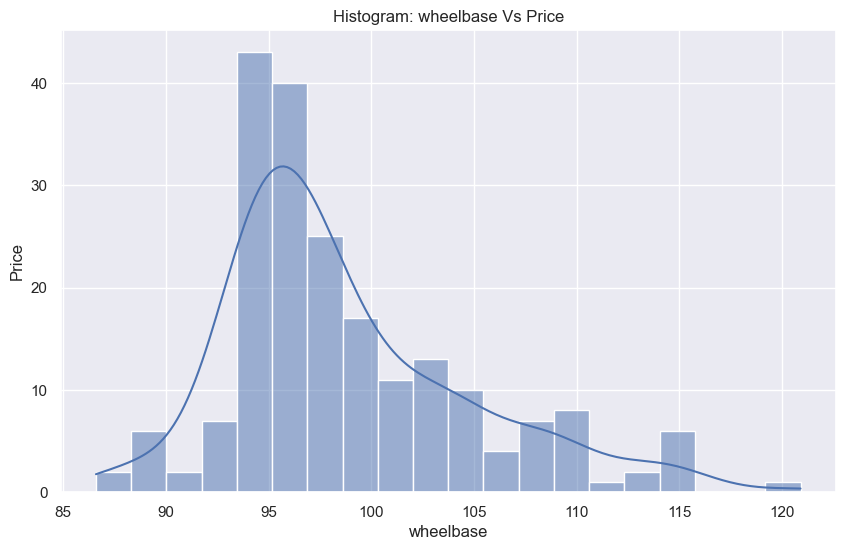

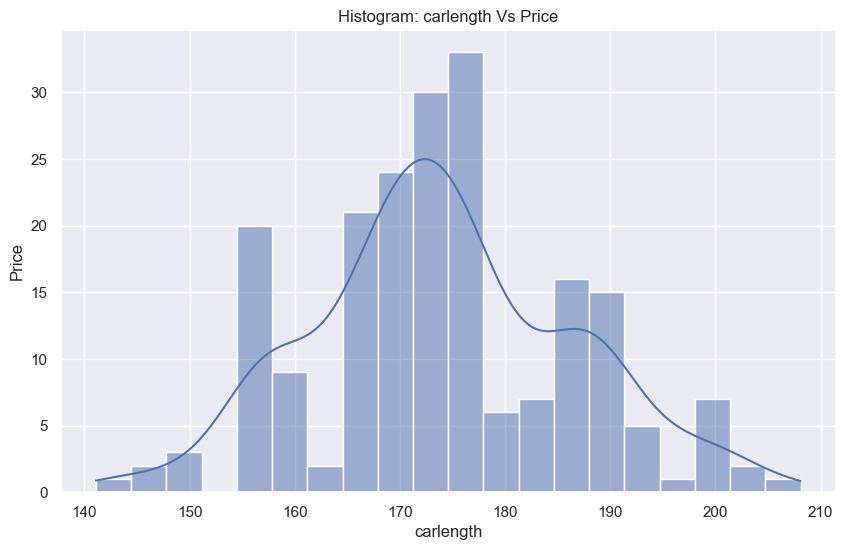

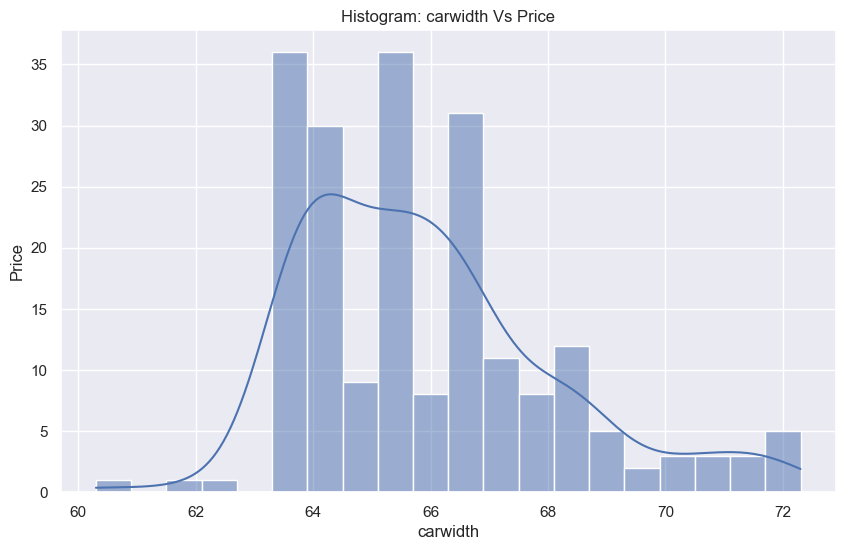

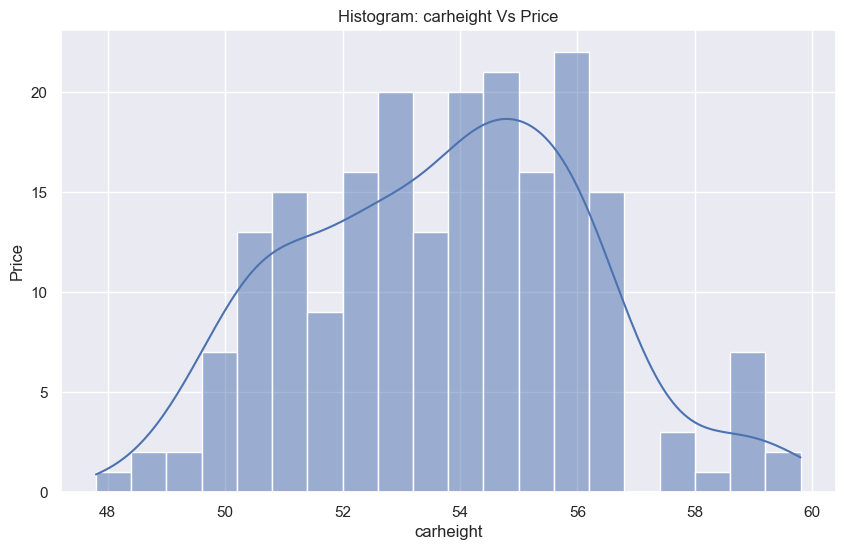

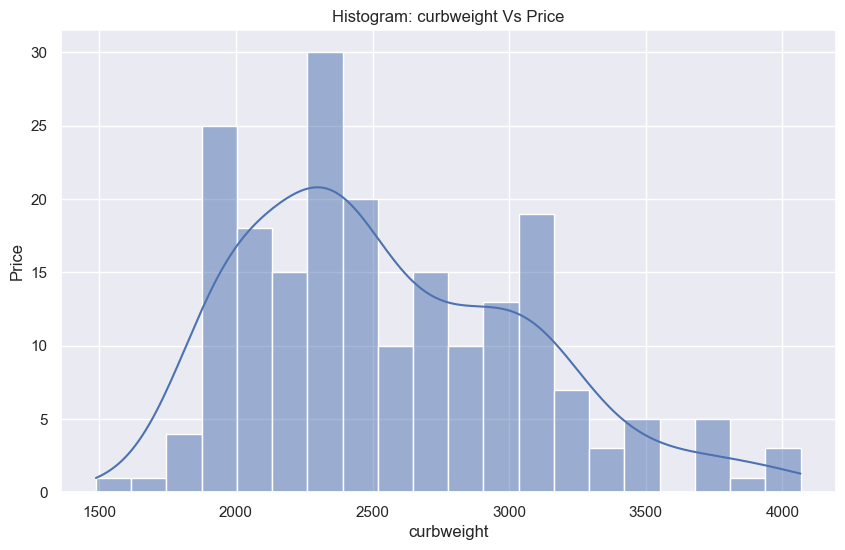

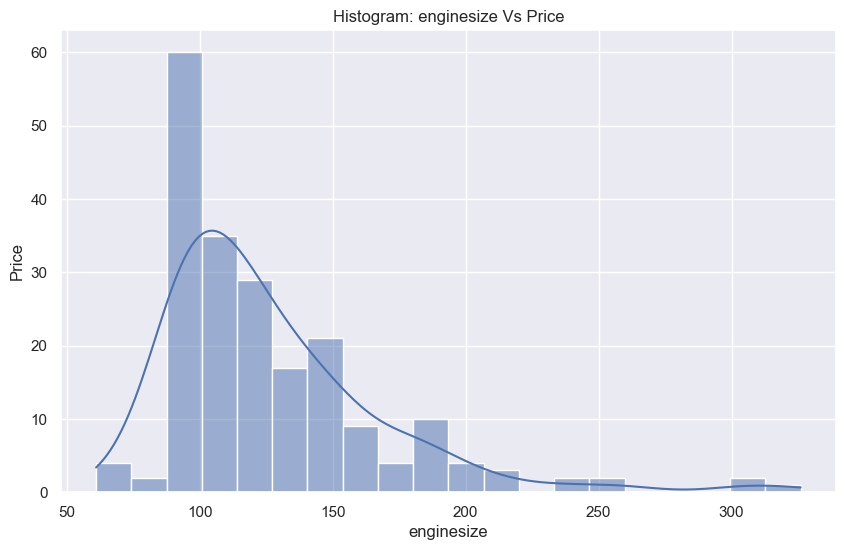

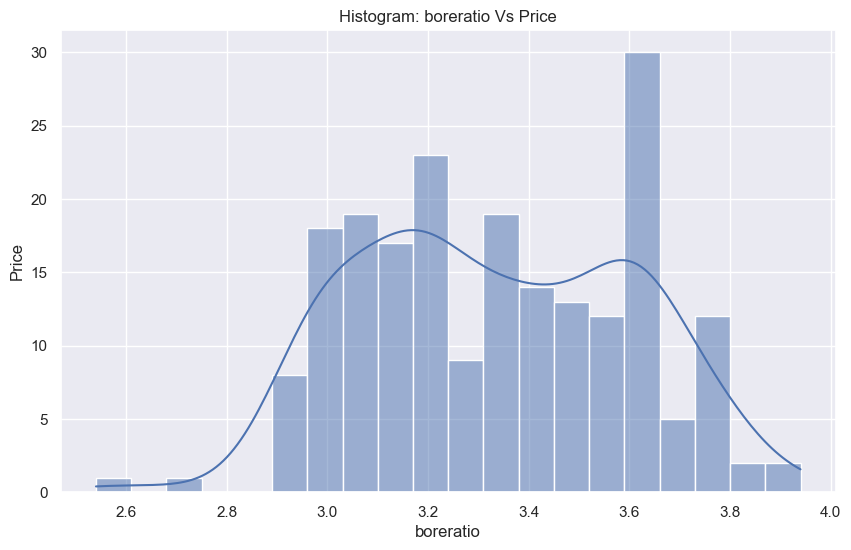

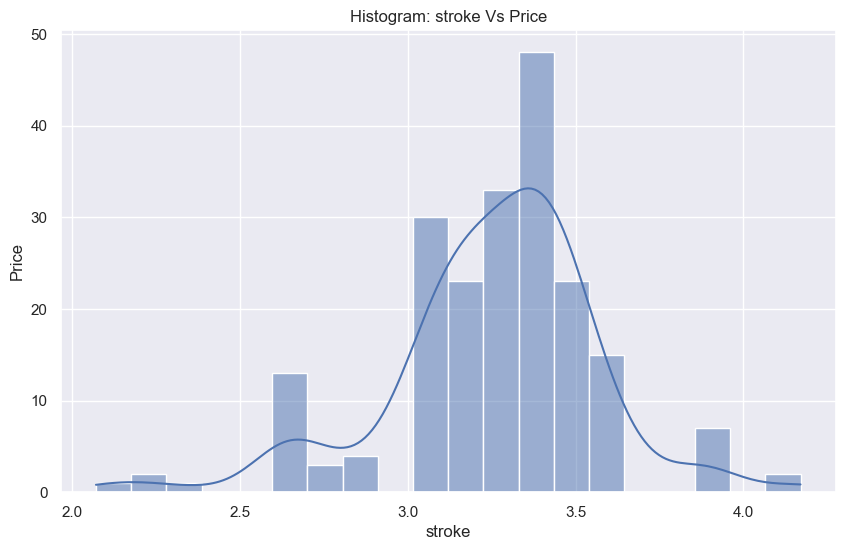

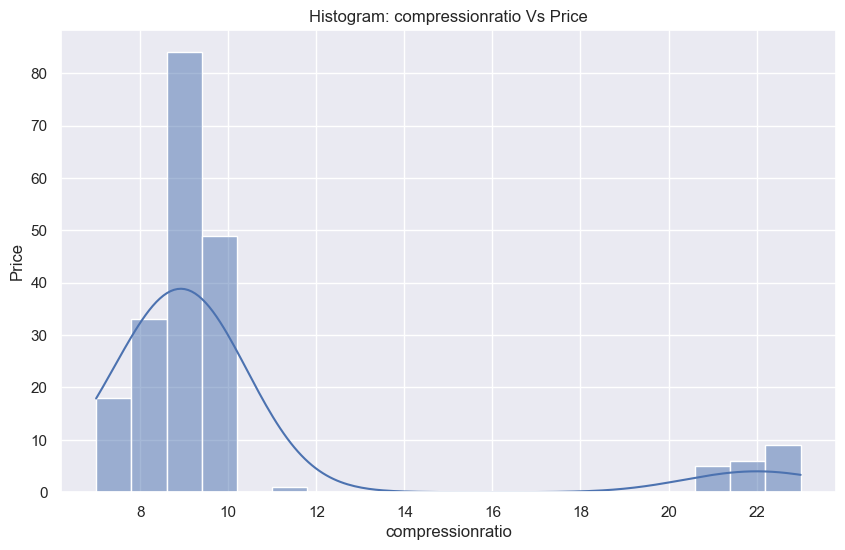

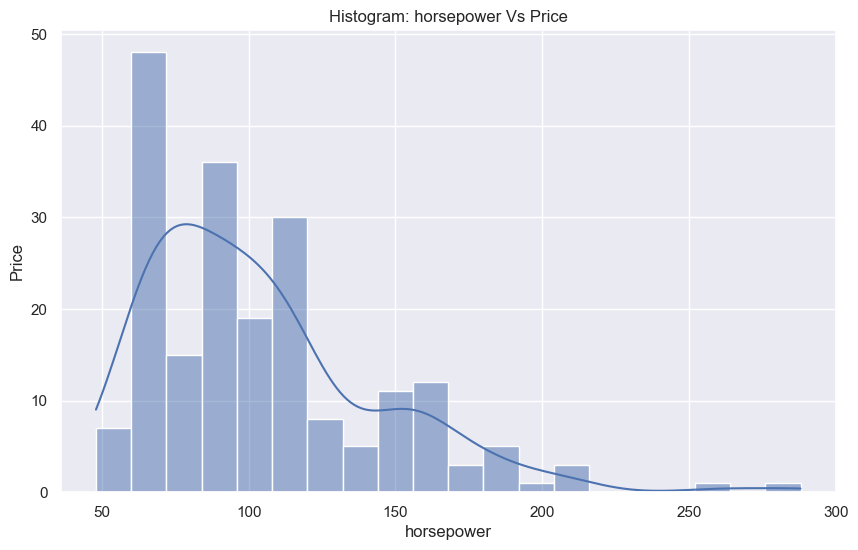

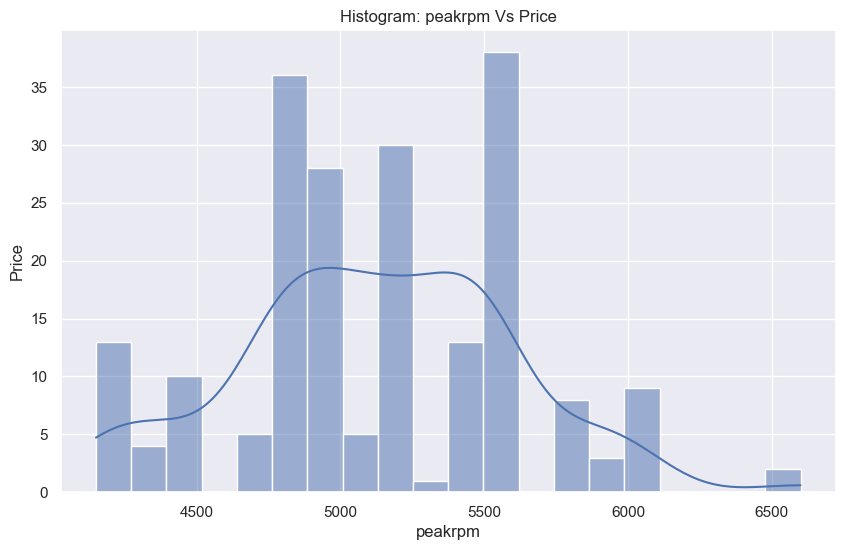

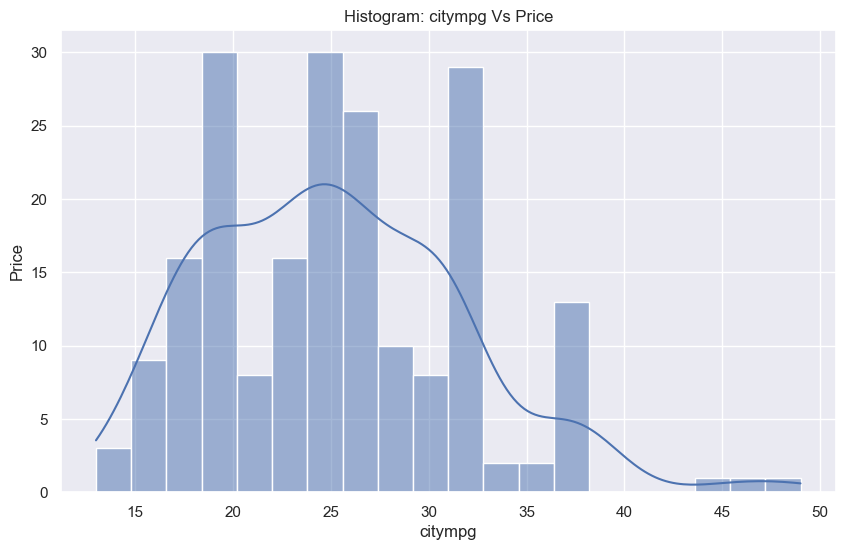

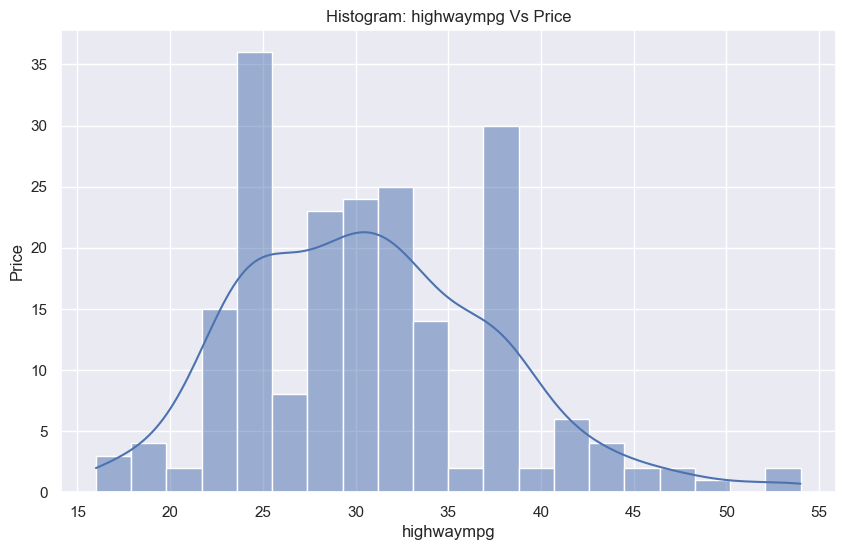

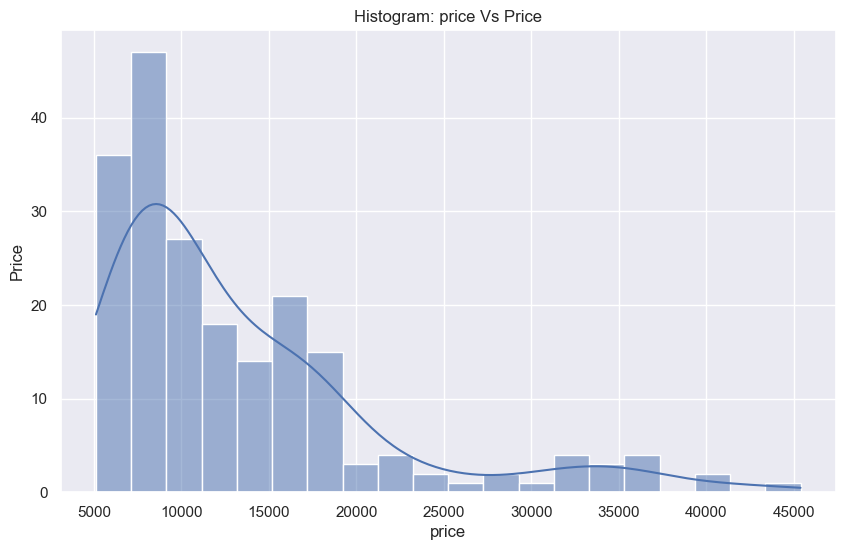

In [42]:
for col in cars.dtypes[cars.dtypes != 'object'].index:
    if col != 'car_ID':
        plt.figure(figsize=(10, 6))
        sns.histplot(cars[col], bins = 20 ,kde=True)
        plt.title(f'Histogram: {col} Vs Price')
        plt.ylabel('Price')
        plt.xlabel(col)
        plt.show()
    

In [43]:
numeric_columns = cars.dtypes[cars.dtypes != 'object'].index
numeric_columns = numeric_columns[1:]   # Remove "car_ID"
numeric_columns


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

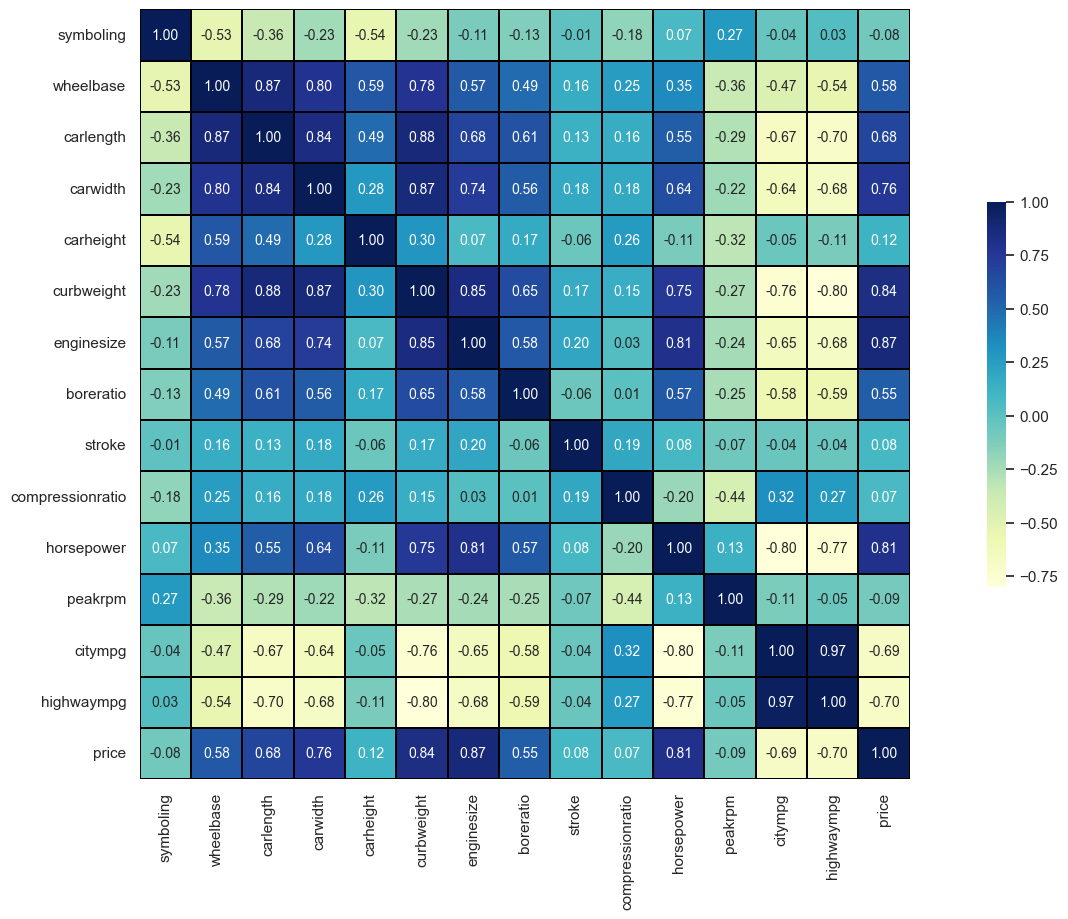

In [44]:
plt.figure(figsize=(20, 10))
sns.heatmap(cars[numeric_columns].corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.2, linecolor='black', square=True, cbar_kws={"shrink": .5}, annot_kws={"size": 10})
plt.show()

## Data Preprocessing

In [45]:
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Label Encoding

In [46]:
cars_df = cars.copy()
cars_df.drop(columns=['car_ID', 'symboling', 'CarName','wheelbase','boreratio', 'stroke','compressionratio','peakrpm'], axis=1, inplace=True)
cars_df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,13495.0
1,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,19,26,16500.0
3,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950.0
4,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,2952,ohc,four,141,mpfi,114,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,188.8,68.8,55.5,3049,ohc,four,141,mpfi,160,19,25,19045.0
202,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,134,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,188.8,68.9,55.5,3217,ohc,six,145,idi,106,26,27,22470.0


##### => Selecting Features

In [47]:
categorical_columns = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]
numerical_columns = ["carlength", "carwidth", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg","price"]

In [48]:
cars_df = pd.get_dummies(columns=["fueltype","enginelocation","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"], data=cars_df)

In [49]:
cars_df

,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price,fueltype_diesel,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,48.8,2548,130,111,21,27,13495.0,False,...,False,False,False,False,False,False,False,True,False,False
1,168.8,64.1,48.8,2548,130,111,21,27,16500.0,False,...,False,False,False,False,False,False,False,True,False,False
2,171.2,65.5,52.4,2823,152,154,19,26,16500.0,False,...,False,False,False,False,False,False,False,True,False,False
3,176.6,66.2,54.3,2337,109,102,24,30,13950.0,False,...,False,False,False,False,False,False,False,True,False,False
4,176.6,66.4,54.3,2824,136,115,18,22,17450.0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952,141,114,23,28,16845.0,False,...,False,False,False,False,False,False,False,True,False,False
201,188.8,68.8,55.5,3049,141,160,19,25,19045.0,False,...,False,False,False,False,False,False,False,True,False,False
202,188.8,68.9,55.5,3012,173,134,18,23,21485.0,False,...,False,False,False,False,False,False,False,True,False,False
203,188.8,68.9,55.5,3217,145,106,26,27,22470.0,True,...,False,False,False,False,False,True,False,False,False,False


### Standardizing

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cars_df[numerical_columns] = scaler.fit_transform(cars_df[numerical_columns])
cars_df

,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price,fueltype_diesel,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.027391,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.404461,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.231513,-0.190566,52.4,0.514882,0.604046,1.264536,-0.953012,-0.691627,0.404461,False,...,False,False,False,False,False,False,False,True,False,False
3,0.207256,0.136542,54.3,-0.420797,-0.431076,-0.053668,-0.186865,-0.109354,0.084485,False,...,False,False,False,False,False,False,False,True,False,False
4,0.207256,0.230001,54.3,0.516807,0.218885,0.275883,-1.106241,-1.273900,0.523668,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.198549,1.398245,55.5,0.763241,0.339248,0.250533,-0.340094,-0.400490,0.447752,False,...,False,False,False,False,False,False,False,True,False,False
201,1.198549,1.351515,55.5,0.949992,0.339248,1.416637,-0.953012,-0.837195,0.723810,False,...,False,False,False,False,False,False,False,True,False,False
202,1.198549,1.398245,55.5,0.878757,1.109571,0.757535,-1.106241,-1.128332,1.029983,False,...,False,False,False,False,False,False,False,True,False,False
203,1.198549,1.398245,55.5,1.273437,0.435538,0.047732,0.119594,-0.546059,1.153582,True,...,False,False,False,False,False,True,False,False,False,False


<Axes: xlabel='enginesize', ylabel='price'>

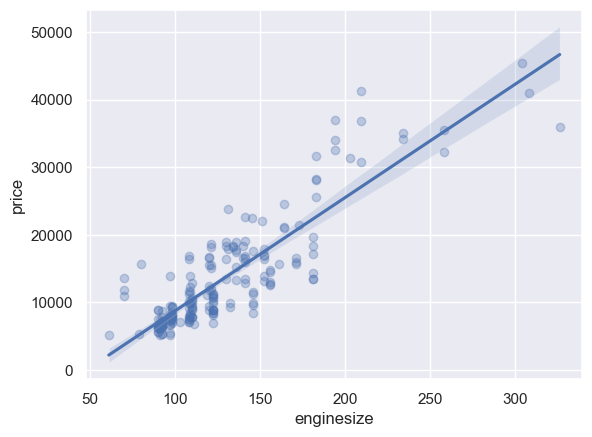

In [51]:
sns.regplot(x='enginesize', y='price', data=cars, scatter_kws={'alpha':0.3})

<Axes: xlabel='curbweight', ylabel='price'>

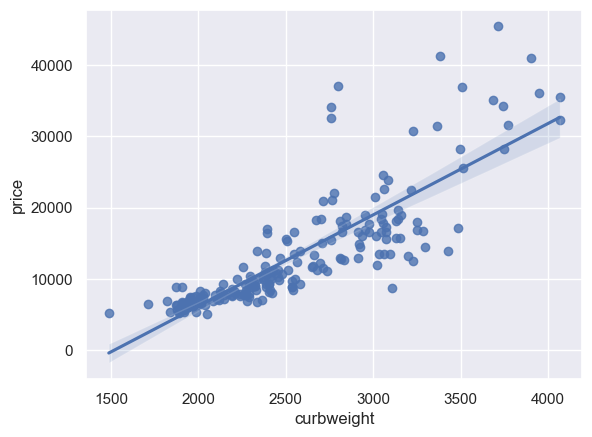

In [52]:
sns.regplot(x='curbweight', y='price', data=cars)

<Axes: xlabel='horsepower', ylabel='price'>

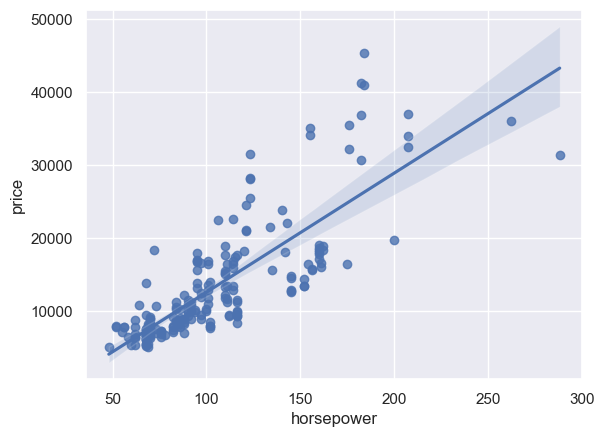

In [53]:
sns.regplot(x='horsepower', y='price', data=cars)

<Axes: xlabel='wheelbase', ylabel='price'>

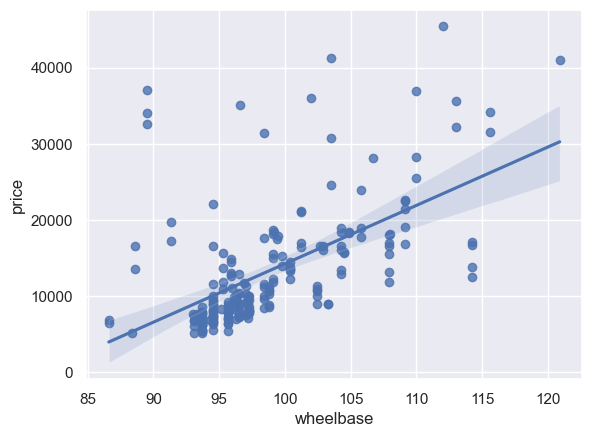

In [54]:
sns.regplot(x='wheelbase', y='price', data=cars)

#### Model Building

In [55]:
X = cars_df.drop(['price'], axis=1)
y = cars['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train.shape),
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(184, 46)
(184,)
(21, 46)
(21,)


### Regressions

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Create a list of regression models to evaluate
regression_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100),
    SVR(),
    KNeighborsRegressor()
]

training_scores = []
testing_scores = []

def model_prediction(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train, x_train_pred) * 100
    b = r2_score(y_test, x_test_pred) * 100
    training_scores.append(a)
    testing_scores.append(b)
    
    print(f"R2 Score of {type(model).__name__} model on Training Data: {a:.2f}")
    print(f"R2 Score of {type(model).__name__} model on Testing Data: {b:.2f}")

for model in regression_models:
    print(f"Evaluating {type(model).__name__} model : ")
    model_prediction(model, X_train, y_train, X_test, y_test)
    print("\n")

best_model_index = testing_scores.index(max(testing_scores))
best_model = regression_models[best_model_index]
best_test_score = testing_scores[best_model_index]

print(f"The best model is {type(best_model).__name__} with an R2 score of {best_test_score:.2f} on the testing data.")

Evaluating LinearRegression model : 
R2 Score of LinearRegression model on Training Data: 91.99
R2 Score of LinearRegression model on Testing Data: 94.77


Evaluating DecisionTreeRegressor model : 
R2 Score of DecisionTreeRegressor model on Training Data: 99.88
R2 Score of DecisionTreeRegressor model on Testing Data: 91.29


Evaluating RandomForestRegressor model : 
R2 Score of RandomForestRegressor model on Training Data: 98.82
R2 Score of RandomForestRegressor model on Testing Data: 94.74


Evaluating SVR model : 
R2 Score of SVR model on Training Data: -11.03
R2 Score of SVR model on Testing Data: -9.90


Evaluating KNeighborsRegressor model : 
R2 Score of KNeighborsRegressor model on Training Data: 87.96
R2 Score of KNeighborsRegressor model on Testing Data: 89.47


The best model is LinearRegression with an R2 score of 94.77 on the testing data.


#### Visualization of Testing Scores

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lg = LinearRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print('R2 Score: ' , r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9476691704840934
MSE:  4191219.866316676
RMSE:  2047.2468992079769


<Axes: xlabel='price'>

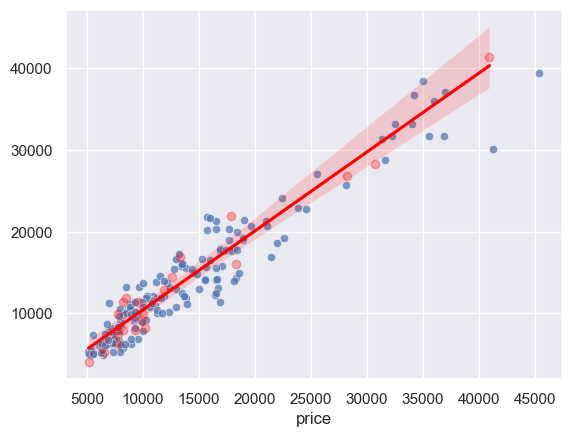

In [63]:
sns.scatterplot(x=y_train, y=lg.predict(X_train), alpha=0.7)
sns.regplot(x=y_test, y=y_pred, color='red', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

-------

-----